# 1. Linear Regression

Linear Regression is one of the simplest supervised learning algorithms.  
It tries to find a **linear relationship** between the input feature(s) (**X**) and the target variable (**y**).  

---

**1. The Model**

For one feature:

$$
\hat{y} = f_{w,b}(x) = w \cdot x + b
$$

Where:
- **$\hat{y}$** = predicted value  
- **$w$** = slope (how much y changes when x increases by 1)  
- **$b$** = intercept (value of y when x = 0)  

---

**Intuition**

- Think of drawing a **straight line** through data points on a scatter plot.  
- Different values of $w$ and $b$ give us different lines.  
- The goal is to find the line that best fits the data by minimizing the error.  


---

**Objective**

We choose $w$ and $b$ such that the line **minimizes the squared error** between predictions and actual values:

$$
J(w,b) = \frac{1}{2m} \sum_{i=1}^{m} \big( f_{w,b}(x^{(i)}) - y^{(i)} \big)^2
$$

This is the **Mean Squared Error (MSE)** cost function.


In [2]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/data/Salary_Data.csv')
data

X = data.iloc[:, :-1].values
y = data.iloc[:,-1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

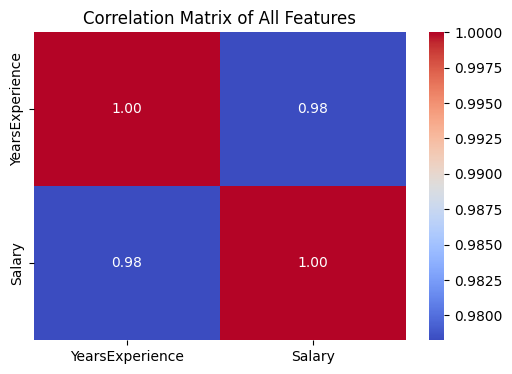

In [3]:
# Show the columns with strong relationship with target by corr and heatmap
from matplotlib import pyplot as plt
import seaborn as sns

# 1. Calculate the correlation matrix for ALL numerical features
corr_matrix = data.corr()

# 2. Create the heatmap using the full matrix
plt.figure(figsize=(6, 4)) # You might need a larger figure to see all features
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of All Features')
plt.show()

In [4]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Parameter value `w` in `coef_`, `b` in `intercept`

In [6]:
w = model.coef_
b = model.intercept_
print(f"w: {w}, b: {b}")

w: [9312.57512673], b: 26780.09915062818


`y_hat` in predict()

In [7]:
y_hat = model.predict(X_test)

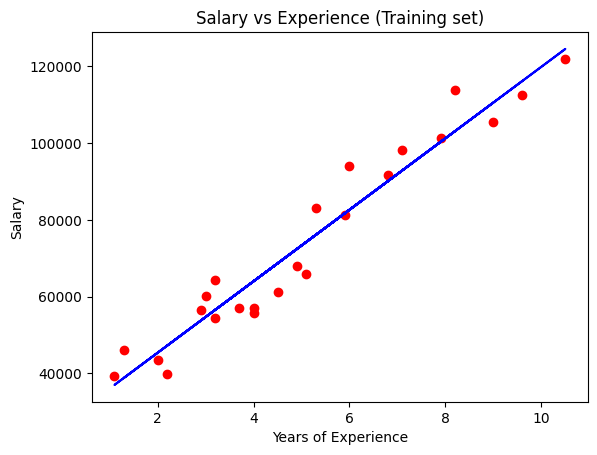

In [8]:
import matplotlib.pyplot as plt

# Predict y values for the training set
y_train_hat = model.predict(X_train)

plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, y_train_hat, color = 'blue') # Use y_train_hat for plotting
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

## 1.1 Multiple Linear Regression (MLR)


**Model**
Extends simple linear regression to **multiple features**:

$$
\hat{y} = w_1x_1 + w_2x_2 + \dots + w_nx_n + b
$$

- Each feature $x_i$ has its own weight $w_i$.  
- Example: Predict house price using **size**, **number of rooms**, and **location score**.  


--

In [11]:
data = pd.read_csv('/content/drive/MyDrive/data/Data_reg.csv')

X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

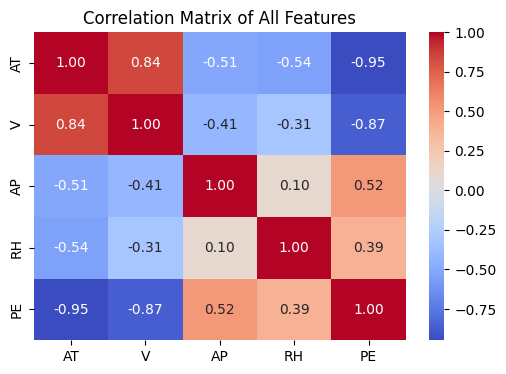

In [12]:
# Show the columns with strong relationship with target by corr and heatmap
from matplotlib import pyplot as plt
import seaborn as sns

# 1. Calculate the correlation matrix for ALL numerical features
corr_matrix = data.corr()

# 2. Create the heatmap using the full matrix
plt.figure(figsize=(6, 4)) # You might need a larger figure to see all features
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of All Features')
plt.show()

In [13]:
from sklearn.linear_model import LinearRegression
mult_reg = LinearRegression()
mult_reg.fit(X_train, y_train)

LinearRegression()

In [14]:
y_hat_mult_reg = mult_reg.predict(X_test)

## 1.2 Polynomial Regression



Polynomial Regression is an extension of linear regression where the model allows **non-linear relationships** by adding powers of the input feature(s).

---

**1. The Model Function**

For polynomial regression of degree $d$, the model is:

$$
f_{w,b}(x) = w_1x + w_2x^2 + w_3x^3 + \dots + w_d x^d + b
$$

- Still **linear in the parameters** ($w_1, w_2, \dots, w_d, b$), but **non-linear in the input variable** $x$.  
- This allows the model to fit curves like parabolas, cubic shapes, or more complex patterns.

---

**2. Examples of Polynomial Degrees**

| Degree ($d$)   | Equation                                                                                       | Shape Example          |
|----------------|------------------------------------------------------------------------------------------------|------------------------|
| 1 (Linear)     | $$f(x) = w_1x + b$$                                                                            | Straight line          |
| 2 (Quadratic)  | $$f(x) = w_1x + w_2x^2 + b$$                                                                   | U-shape / parabola     |
| 3 (Cubic)      | $$f(x) = w_1x + w_2x^2 + w_3x^3 + b$$                                                          | S-shape / cubic curve  |


---

- Polynomial Regression transforms features into powers of $x$.
- Increasing the degree $d$ makes the model more flexible but may cause **overfitting**.

In [15]:
from sklearn.preprocessing import PolynomialFeatures
pol_reg = PolynomialFeatures(degree = 2)

X_poly = pol_reg.fit_transform(X_train)
regressor = LinearRegression()
regressor.fit(X_poly, y_train)

LinearRegression()

In [16]:
y_hat_p = regressor.predict(pol_reg.transform(X_test))

# 2. Support Vector Regression (SVR)


**Model**

SVR predicts continuous values by fitting a function within a margin of tolerance **(ε)**.  
- Small errors (within ε) are ignored → makes the model **robust to noise**.  
- Large errors (outside ε) are penalized.  
- This prevents **overfitting** and keeps the model focused on the general trend.

Equation (linear kernel example):

$$
f(x) = w \cdot x + b
$$

- With the **kernel trick**, SVR can model non-linear relationships.

---

**Why Use SVR?**

- **Not all data points are equally important** → small deviations often represent random noise.  
- SVR focuses only on **significant errors**, producing more stable predictions.

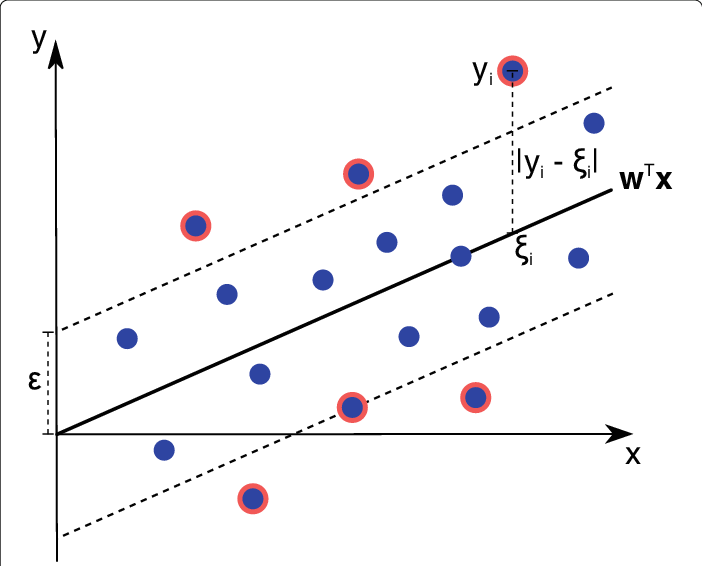

---

**Real-world Example**

**House Price Prediction**:  
Two houses with the same features may differ in price by a small amount (noise).  
- Linear regression tries to fit these small differences → unstable model.  
- SVR ignores minor deviations (e.g., < $5000) and learns the **true pricing pattern**.

---

**Important Parameters in SVR (scikit-learn)**

- **kernel** (default = `"rbf"`)  
  - Defines the function that maps data into higher dimensions.  
  - Options: `"linear"`, `"poly"`, `"rbf"`, `"sigmoid"`.  
  - `"rbf"` is most common for non-linear problems.

- **C** (default = `1.0`)  
  - Regularization parameter.  
  - Large `C` → model tries to fit the data more strictly (less tolerance).  
  - Small `C` → model is more tolerant, smoother fit.

- **epsilon (ε)** (default = `0.1`)  
  - Size of the **ε-insensitive tube** around predictions.  
  - Errors inside ε are ignored.  
  - Larger ε → simpler model, ignores more small errors.  
  - Smaller ε → stricter, fits closer to the data.

- **gamma** (default = `"scale"`)  
  - Only used in `"rbf"`, `"poly"`, `"sigmoid"`.  
  - Controls how far the influence of a single training point reaches.  
  - Large `gamma` → closer fit (risk of overfitting).  
  - Small `gamma` → smoother decision function.

- **degree** (default = `3`)  
  - Only used when `kernel="poly"`.  
  - Controls polynomial degree.

- **coef0** (default = `0.0`)  
  - Used in `"poly"` and `"sigmoid"` kernels.  
  - Adjusts the influence of higher-order terms.

---

In [33]:
from sklearn.svm import SVR

svr = SVR(kernel='linear')
svr.fit(X_train, y_train)

SVR(kernel='linear')

In [34]:
y_hat_svr = svr.predict(X_test)

# 3. Decision Tree Regression


A **Decision Tree Regressor** is a supervised learning algorithm used for **predicting continuous values**.  
It works by recursively splitting the dataset into regions based on feature thresholds and assigning each region a prediction equal to the **average of the target values** inside it.  

---

**How does a Regression Tree split?**

At each node:
1. Choose a feature (e.g., age, income, temperature).  
2. Try all possible thresholds for that feature.  
3. Evaluate the quality of the split using an **error measure** (e.g., MSE).  
4. Select the feature + threshold that minimizes the error.  

---

**Example Visualization**

Below is an example of how a regression tree splits a 2D space and the corresponding tree structure:  

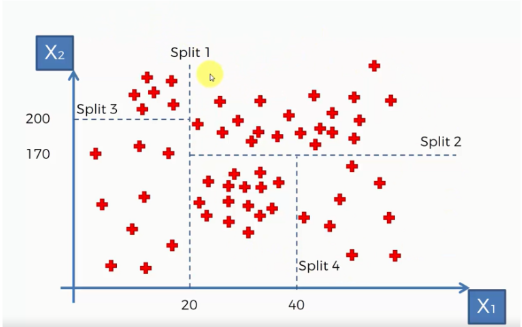

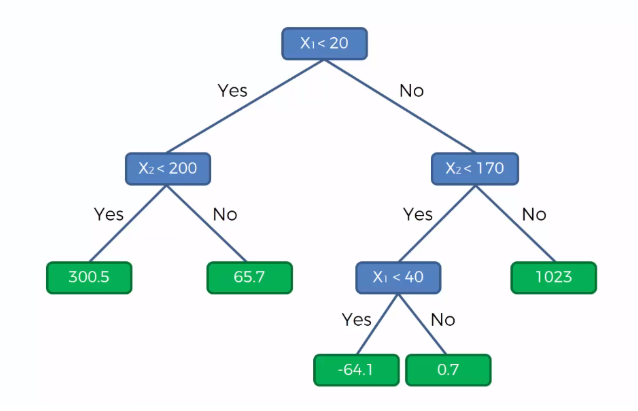

- Each leaf predicts the **mean target value** inside that region.  

---

**Important Notes**

- **Hyperparameters**:  
  - `max_depth` → maximum depth of the tree (controls complexity).  
  - `min_samples_split` → minimum samples required to split a node.  
  - `min_samples_leaf` → minimum samples at a leaf node.  
  - `criterion` → `"squared_error"` (MSE) or `"absolute_error"` (MAE).  

In [19]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state = 0)
dtr.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [20]:
y_hat_dt = dtr.predict(X_test)

## 3.1 Random Forest Regression



A **Random Forest Regressor** is an **ensemble learning method** that builds multiple decision trees and combines their predictions.  
Instead of relying on a single tree, it takes the **average** of many trees, which makes the model more robust and less prone to overfitting.  

---

**Key Parameters**

| Parameter            | Description                                                                 |
|-----------------------|-----------------------------------------------------------------------------|
| `n_estimators`       | Number of trees in the forest. More trees → more stable but slower.         |
| `max_depth`          | Maximum depth of each tree (controls overfitting).                          |
| `min_samples_split`  | Minimum samples required to split a node.                                   |
| `min_samples_leaf`   | Minimum samples required at a leaf node.                                    |
| `max_features`       | Number of features to consider when looking for the best split.             |
| `criterion`          | Error function: `"squared_error"` (MSE) or `"absolute_error"` (MAE).        |
| `bootstrap`          | Whether to use bootstrap sampling (`True` by default).                      |



In [21]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators = 20, random_state = 0)
rfr.fit(X_train, y_train)

RandomForestRegressor(n_estimators=20, random_state=0)

In [22]:
y_hat_rfr = rfr.predict(X_test)

# 4. Model Performance Evaluation (Regression)

## 4.1 Mean Square Error

**Linear Regression Model**

For one feature:

$$
\hat{y} = w x + b
$$

---

**Cost Function Mean Squared Error (MSE):**

We measure the error using **Mean Squared Error (MSE):**

$$
J(w, b) = \frac{1}{2m} \sum_{i=1}^m \left( \hat{y}^{(i)} - y^{(i)} \right)^2
$$

Goal: minimize \( J(w,b) \).

---

** Gradient Descent Algorithm**

Update rules:

$$
w := w - \alpha \frac{\partial J}{\partial w}
$$

$$
b := b - \alpha \frac{\partial J}{\partial b}
$$

Where:
- \( alpha ) = learning rate (step size).  

---

**Gradients**

Partial derivatives:

$$
\frac{\partial J}{\partial w} = \frac{1}{m} \sum_{i=1}^m \left( \hat{y}^{(i)} - y^{(i)} \right) x^{(i)}
$$

$$
\frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m \left( \hat{y}^{(i)} - y^{(i)} \right)
$$

---

**Process**

1. Initialize \(w, b\) (e.g., to 0).  
2. Compute predictions \( \hat{y} \).  
3. Calculate cost \( J(w,b) \).  
4. Update \(w, b\) using gradients.  
5. Repeat until convergence (cost stops decreasing).  

---

**Visualization**

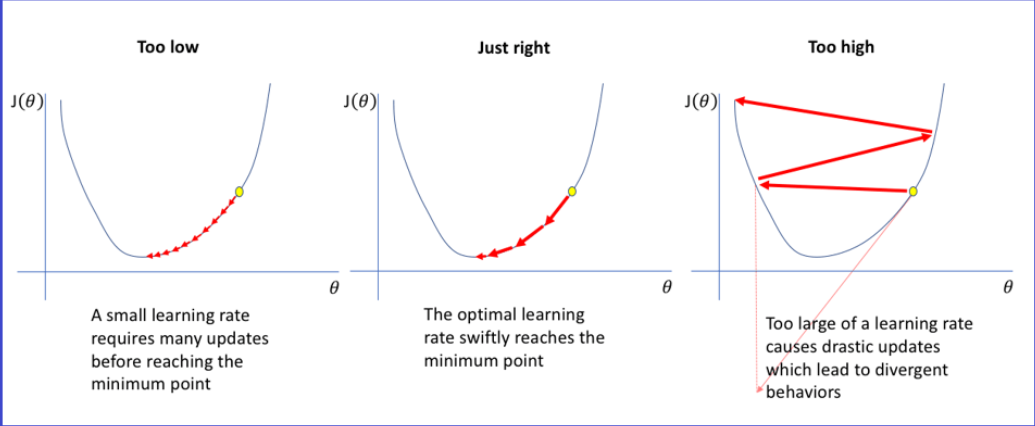




## 4.2 R² (Coefficient of Determination)



The **R²** value measures how well a regression model explains the variation in the dependent variable.  

R² = 1 - (SSR / SST)

- **SSR** = Sum of Squared Residuals (errors)  
- **SST** = Total Sum of Squares  

**Example:**  
If \(R^2 = 0.80\), the model explains **80% of the variation** in the dependent variable.  

---

**The Problem with R²**

- **R² never decreases** when new predictors are added.  
- Even if a predictor is irrelevant, \(R^2\) will slightly increase or stay the same.  
- This gives a **misleading impression** that the model is always improving.  

---

**The Solution: Adjusted R²**

**Adjusted R²** accounts for the **number of predictors** and the **sample size**.  
It increases only if a new predictor improves the model significantly; otherwise, it decreases.  


$$
R^2_{adj} = 1 - \left( \frac{(1 - R^2)(n - 1)}{n - k - 1} \right)
$$


Where:  
- \(n\) = number of observations  
- \(k\) = number of predictors  

---

  
- Use **R²** to measure overall fit.  
- Use **Adjusted R²** to compare models with different numbers of predictors, since it prevents overestimating model quality.


In [35]:
from sklearn.metrics import mean_squared_error
print("Multiple: ", mean_squared_error(y_test, y_hat_mult_reg))
print("Poly: ",mean_squared_error(y_test, y_hat_p))
print("SVR: ",mean_squared_error(y_test, y_hat_svr))
print("DTR: ",mean_squared_error(y_test, y_hat_dt))
print("RFR: ",mean_squared_error(y_test, y_hat_rfr))

Multiple:  19.733699303497637
Poly:  16.914932472818215
SVR:  19.877856807575174
DTR:  22.549093991640547
RFR:  10.539879480930006


In [36]:
from sklearn.metrics import r2_score
print("Multiple: ", r2_score(y_test, y_hat_mult_reg))
print("Poly: ",r2_score(y_test, y_hat_p))
print("SVR: ",r2_score(y_test, y_hat_svr))
print("DTR: ",r2_score(y_test, y_hat_dt))
print("RFR: ",r2_score(y_test, y_hat_rfr))

Multiple:  0.9325315554761303
Poly:  0.9421687659462276
SVR:  0.932038688810992
DTR:  0.922905874177941
RFR:  0.9639647253608774


# Conclusion

---

**Regression**

Linear regression and its advanced variations (Multiple LR, Polynomial LR, SVR, Decision Trees, Random Forests) are powerful tools for predicting continuous outcomes.
But choosing the **right algorithm**, **parameters**, and **evaluation metrics** makes all the difference.  

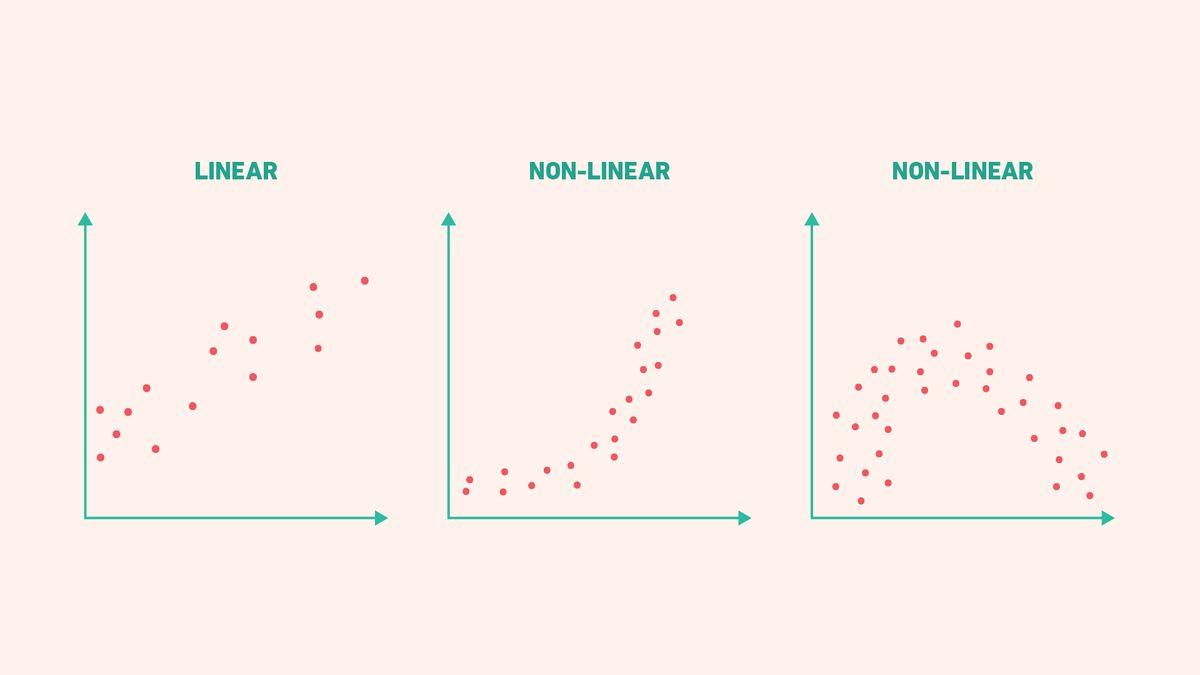
---


- **Algorithms:**  
  - Start simple (Linear Regression).  
  - Move to more flexible models (SVR, Trees, Ensembles) if data is complex or non-linear.  

- **Parameters (Hyperparameters):**  
  - Always tune parameters like `C`, `epsilon`, `max_depth`, etc.  
  - Use techniques like **Grid Search** or **Cross-Validation** to find the best settings.  

- **Error Metrics:**  
  - Don’t rely on a single measure.  
  - Combine **MSE** (error magnitude), **R²** (variance explained), and **Adjusted R²** (model fairness with multiple predictors).  

- **Practical Advice:**  
  - Watch out for **overfitting** (too complex model).  
  - Don’t ignore **underfitting** (too simple model).  
  - The best model is not the most complex, but the one that balances **accuracy** and **generalization**.  

---

 **Final Thought:**  
Regression models are the backbone of predictive analytics. Mastering them means mastering the art of making **data-driven decisions**.  
Algorithms, parameters, and error metrics are your **toolbox** — but the real skill lies in knowing **when and how to use each one**.  

---
